# Reranker

![Screenshot from 2025-04-01 17-03-04.png](<attachment:Screenshot from 2025-04-01 17-03-04.png>)
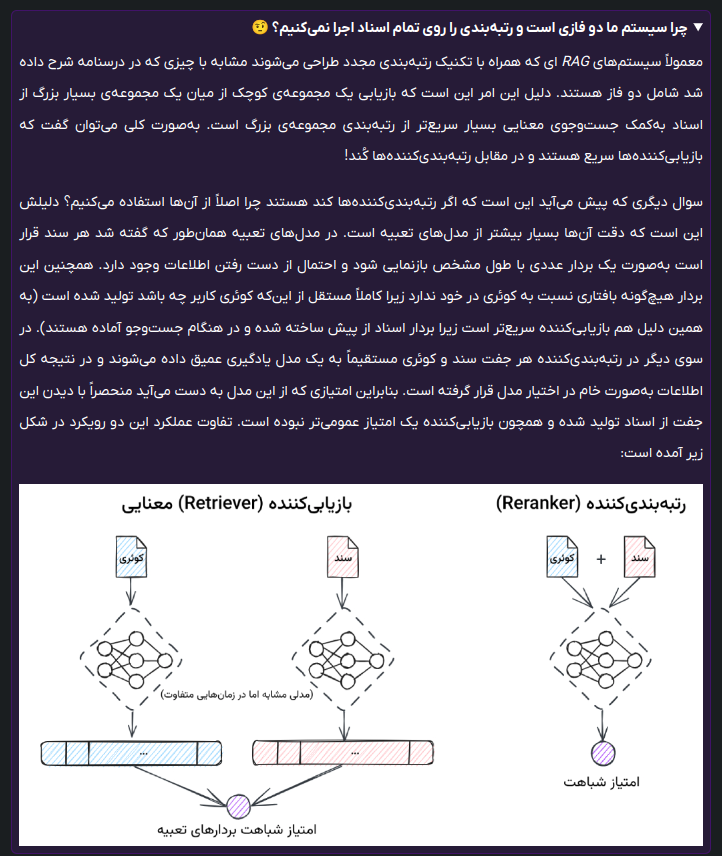

## Load document

In [20]:
from langchain_community.document_loaders import WikipediaLoader

wikipedia_docs = WikipediaLoader(
    query="ارباب حلقه‌ها",
    lang="fa",
    load_max_docs=7,
    doc_content_chars_max=100000).load()

In [7]:
## remove unsued parameter summary
for doc in wikipedia_docs:
    doc.metadata.pop("summary", None)

wikipedia_docs

[Document(metadata={'title': 'ارباب حلقه\u200cها', 'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D8%B1%D8%A8%D8%A7%D8%A8_%D8%AD%D9%84%D9%82%D9%87%E2%80%8C%D9%87%D8%A7'}, page_content='ارباب حلقه\u200cها (انگلیسی: The Lord of the Rings) رمان خیال\u200cپردازی حماسی نوشتهٔ مؤلف انگلستانی جی. آر. آر. تالکین است. داستان این رمان در سرزمین میانه رقم می\u200cخورد؛ مکانی مانند زمین و تا حدودی مدت\u200cها پیش در زمان\u200cهای گذشته. این داستان به عنوان دنباله\u200cای بر کتاب کودکانهٔ هابیت نوشتهٔ تالکین در سال ۱۹۳۷ آغاز شد، اما در نهایت به اثری بسیار بزرگ تبدیل شد. این کتاب به صورت مرحله\u200cای میان سال\u200cهای ۱۹۳۷ تا ۱۹۴۹ نوشته شده\u200cاست. ارباب حلقه\u200cها با فروش بیش از ۱۵۰ میلیون نسخه در جهان، یکی از پرفروش\u200cترین کتاب\u200cهای تاریخ است.\nعنوان کتاب به آنتاگونیست اصلی داستان، یعنی ارباب تاریکی سائورون اشاره دارد که در دوران پیشین حلقهٔ یگانه را ساخت تا در کارزار خود برای تسخیر تمام سرزمین میانه، بر دیگر حلقه\u200cهای قدرت که به انسان\u200cها، دورف\u200cها و الف\u200cها اهدا شده 

In [8]:
print(wikipedia_docs[0].page_content)

ارباب حلقه‌ها (انگلیسی: The Lord of the Rings) رمان خیال‌پردازی حماسی نوشتهٔ مؤلف انگلستانی جی. آر. آر. تالکین است. داستان این رمان در سرزمین میانه رقم می‌خورد؛ مکانی مانند زمین و تا حدودی مدت‌ها پیش در زمان‌های گذشته. این داستان به عنوان دنباله‌ای بر کتاب کودکانهٔ هابیت نوشتهٔ تالکین در سال ۱۹۳۷ آغاز شد، اما در نهایت به اثری بسیار بزرگ تبدیل شد. این کتاب به صورت مرحله‌ای میان سال‌های ۱۹۳۷ تا ۱۹۴۹ نوشته شده‌است. ارباب حلقه‌ها با فروش بیش از ۱۵۰ میلیون نسخه در جهان، یکی از پرفروش‌ترین کتاب‌های تاریخ است.
عنوان کتاب به آنتاگونیست اصلی داستان، یعنی ارباب تاریکی سائورون اشاره دارد که در دوران پیشین حلقهٔ یگانه را ساخت تا در کارزار خود برای تسخیر تمام سرزمین میانه، بر دیگر حلقه‌های قدرت که به انسان‌ها، دورف‌ها و الف‌ها اهدا شده بود فرمانروایی کند. از پیدایش در شایر—سرزمین هابیت‌ها که یادآور حومهٔ انگلستان است—داستان این رمان در سرتاسر سرزمین میانی و در پی تلاش برای از بین بردن حلقه یگانه است که عمدتاً از سوی هابیت‌هایی به‌نام فرودو، سم، مری و پیپین روایت می‌شود.
این اثر از نظر تالکین یک جلد

In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=25)

splitted_docs = text_splitter.split_documents(wikipedia_docs)
print(f"Number of splitted docs: {len(splitted_docs)}")

Number of splitted docs: 206


## GET API Key

In [12]:
import os
import getpass

os.environ["COHERE_API_KEY"] = getpass.getpass()


In [13]:
cohere_API_KEY = os.getenv("COHERE_API_KEY")

## Load cohere model

In [14]:
from langchain_cohere import CohereEmbeddings

embeeddings = CohereEmbeddings(
    model = "embed-multilingual-light-v3.0",
    max_retries = 5,
    request_timeout = 20
)

## Create Vectorstore

In [23]:
from langchain_community.vectorstores import Chroma

vectorstore = Chroma.from_documents(   
    documents=splitted_docs,
    embedding=embeeddings,
    persist_directory="lord_of_the_rings1",
    collection_name="collections"
)

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
INFO:backoff:Backing off send_request(...) for 1.0s (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))))
INFO:backoff:Backing off send_request(...) for 0.7s (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))))
INFO:backoff:Backing off send_request(...) for 4.0s (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries ex

INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"


## Retrieve documents

In [ ]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 8})

query = 'آیا ارباب حلقه‌ها سیاسی است؟'
results = retriever.invoke(query)

for counter, result in enumerate(results):
    print('Document Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('-'*100)

Document Title: ارباب حلقه‌ها
Document Content: ارباب حلقه‌ها جزو آن دسته از آثار قرن بیستم و مدرنی است که به هر دلیل مورد کژفهمی پژوهشگران ادبیات قرار گرفته‌است. مایکل دراوت و هیلاری وین ادعا کرده‌اند که «علت اصلی اینکه منتقدان مدرنیست و پسامدرنیست ارباب حلقه‌ها را طرد می‌کنند، این است که آنان سطح نوشتار جملات تالکین را پایین‌تر از بسیاری از هم عصرانش می‌دانند. آثار تالکین و نقد آن‌ها کمتر از آن چیزی که باید، در حلقهٔ نقد ادبی نخبگان
----------------------------------------------------------------------------------------------------
Document Title: ارباب حلقه‌ها: حلقه‌های قدرت
Document Content: داستان ارباب حلقه‌ها: حلقه‌های قدرت هزاران سال پیش از رخدادهای هابیت و ارباب حلقه‌ها جریان دارد و بر اساس تاریخ سرزمین میانه اثر مؤلف انگلیسی جی. آر. آر. تالکین ساخته شده است. داستان در زمان صلح آغاز می‌شود و تمام رویدادهای مهم دوران دوم سرزمین میانه را پوشش می‌دهد که شامل ساخت حلقه‌های قدرت، ظهور ارباب تاریکی سائورون، سقوط پادشاهی جزیرهٔ نومه‌نور، و آخرین اتحاد بین الف‌ها و انسان‌ها می‌شود. ای

INFO:backoff:Backing off send_request(...) for 0.2s (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))))
INFO:backoff:Backing off send_request(...) for 0.4s (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))))
INFO:backoff:Backing off send_request(...) for 2.3s (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))))
ERROR:backoff:Giving up send_request(...) after 4 tries (requests.exceptions.SS

## Cohere-Reranking

In [25]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

compressor = CohereRerank(model="rerank-multilingual-v3.0",
                          top_n=4)

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=retriever)

query = 'آیا ارباب حلقه‌ها سیاسی است؟'
compressed_docs = compression_retriever.invoke(query)

for result in compressed_docs:
    print('Documnt Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('-'*100)


INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/rerank "HTTP/1.1 200 OK"


Documnt Title: ارباب حلقه‌ها
Document Content: به‌علاوه، دراوت و وین می‌گویند «دلیل اصلی خصومت با اثر تالکین محتوای سیاسی محتمل یا موضوع آن است» که اغلب آن را ارتجاعی می‌دانند. البته نقدهای اخیر آثار تالکین با این استنباط به مقابله برخاسته‌اند؛ مثلاً پاتریک کاری استدلال می‌کند که ارزش‌های (اجتماعی، زیست‌بوم‌شناختی و معنوی) مستتر در ارباب حلقه‌ها «دقیقاً مبین شرایطی» است که خسارت‌های «دهشتناک» نوگرایی بر جای گذاشته‌است و «این‌ها همان ارزش‌هایی
----------------------------------------------------------------------------------------------------
Documnt Title: ارباب حلقه‌ها: حلقه‌های قدرت
Document Content: ارباب حلقه‌ها: حلقه‌های قدرت (انگلیسی: The Lord of the Rings: The Rings of Power) مجموعهٔ تلویزیونی آمریکایی در ژانر فانتزی است که بر اساس رمان ارباب حلقه‌ها و پیوست‌هایش اثر جی. آر. آر. تالکین ساخته شده است. این مجموعه که به‌دست شورانرهایش جی.دی. پین و پاتریک مک‌کی برای سرویس پخش اینترنتی آمازون پرایم ویدئو ساخته می‌شود، داستان دوران دوم سرزمین میانه را روایت می‌کند که هزاران سال پیش از

## Flashrank-reranking

In [18]:
!pip install flashrank

In [26]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import FlashrankRerank

compressor = FlashrankRerank(top_n=4)

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=retriever)

query = 'آیا ارباب حلقه‌ها سیاسی است؟'
compressed_docs = compression_retriever.invoke(query)  

for result in compressed_docs:
    print('Documnt Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('-'*100)

Documnt Title: ارباب حلقه‌ها
Document Content: زبان‌شناسی تاریخی، اسطوره‌شناسی، مذهب، انزجار نویسنده از صنعتی شدن، اثرهای فانتزی قبلی و تجربیات تالکین در جنگ جهانی اول همه از جمله مواردی هستند که می‌توان گفت در پیدایش ارباب حلقه‌ها نقش بزرگی ایفا کرده‌اند. این بن‌مایه‌ها و تأثیرات اغلب توسط خود تالکین رد شده‌است.
----------------------------------------------------------------------------------------------------
Documnt Title: ارباب حلقه‌ها
Document Content: این اثر از نظر تالکین یک جلد از مجموعهٔ دو جلدی به همراه سیلماریلیون بود، اگرچه عموماً برای خوانندگان به‌نام سه‌گانه شناخته می‌شود. به دلایل اقتصادی، ارباب حلقه‌ها در طول یک سال از ۲۹ ژوئیه ۱۹۵۴ تا ۲۰ اکتبر ۱۹۵۵ در سه جلد با عنوان‌های یاران حلقه, دو برج و بازگشت پادشاه به چاپ رسید. این اثر در درون خود به شش کتاب، دو جلد و چندین ضمیمه از مطالب پیشینه داستان تقسیم شد. برخی از نسخه‌های بعدی مطابق
----------------------------------------------------------------------------------------------------
Documnt Title: ارباب حلقه‌ها
Document C

## Get answer from RAG

In [27]:
from langchain_cohere import ChatCohere
from langchain.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

llm = ChatCohere(cohere_api_key=cohere_API_KEY)

system_prompt = (
    "از محتوای بافتاری زیر برای پاسخ به سوال استفاده کن"
    "اگر پاسخ سوال را نمی‌دانی، بگو نمی‌دانم. "
    "پاسخ خود را مختصر و دقیق نگه دار و حداکثر در سه جمله بنویس."
    "بافتار: {context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

question_answer_chain = create_stuff_documents_chain(llm, prompt)
chain = create_retrieval_chain(compression_retriever, question_answer_chain)

INFO:httpx:HTTP Request: GET https://api.cohere.com/v1/models?endpoint=chat&default_only=true "HTTP/1.1 200 OK"


In [ ]:
query = 'آیا ارباب حلقه‌ها سیاسی است؟'
response = chain.invoke({"input": query})

INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"


Response: [Document(metadata={'id': 5, 'relevance_score': 0.99971765, 'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D8%B1%D8%A8%D8%A7%D8%A8_%D8%AD%D9%84%D9%82%D9%87%E2%80%8C%D9%87%D8%A7', 'summary': 'ارباب حلقه\u200cها (انگلیسی: The Lord of the Rings) رمان خیال\u200cپردازی حماسی نوشتهٔ مؤلف انگلستانی جی. آر. آر. تالکین است. داستان این رمان در سرزمین میانه رقم می\u200cخورد؛ مکانی مانند زمین و تا حدودی مدت\u200cها پیش در زمان\u200cهای گذشته. این داستان به عنوان دنباله\u200cای بر کتاب کودکانهٔ هابیت نوشتهٔ تالکین در سال ۱۹۳۷ آغاز شد، اما در نهایت به اثری بسیار بزرگ تبدیل شد. این کتاب به صورت مرحله\u200cای میان سال\u200cهای ۱۹۳۷ تا ۱۹۴۹ نوشته شده\u200cاست. ارباب حلقه\u200cها با فروش بیش از ۱۵۰ میلیون نسخه در جهان، یکی از پرفروش\u200cترین کتاب\u200cهای تاریخ است.\nعنوان کتاب به آنتاگونیست اصلی داستان، یعنی ارباب تاریکی سائورون اشاره دارد که در دوران پیشین حلقهٔ یگانه را ساخت تا در کارزار خود برای تسخیر تمام سرزمین میانه، بر دیگر حلقه\u200cهای قدرت که به انسان\u200cها، دورف\u200cها و الف\u

In [31]:
response['context']

[Document(metadata={'id': 5, 'relevance_score': 0.99971765, 'source': 'https://fa.wikipedia.org/wiki/%D8%A7%D8%B1%D8%A8%D8%A7%D8%A8_%D8%AD%D9%84%D9%82%D9%87%E2%80%8C%D9%87%D8%A7', 'summary': 'ارباب حلقه\u200cها (انگلیسی: The Lord of the Rings) رمان خیال\u200cپردازی حماسی نوشتهٔ مؤلف انگلستانی جی. آر. آر. تالکین است. داستان این رمان در سرزمین میانه رقم می\u200cخورد؛ مکانی مانند زمین و تا حدودی مدت\u200cها پیش در زمان\u200cهای گذشته. این داستان به عنوان دنباله\u200cای بر کتاب کودکانهٔ هابیت نوشتهٔ تالکین در سال ۱۹۳۷ آغاز شد، اما در نهایت به اثری بسیار بزرگ تبدیل شد. این کتاب به صورت مرحله\u200cای میان سال\u200cهای ۱۹۳۷ تا ۱۹۴۹ نوشته شده\u200cاست. ارباب حلقه\u200cها با فروش بیش از ۱۵۰ میلیون نسخه در جهان، یکی از پرفروش\u200cترین کتاب\u200cهای تاریخ است.\nعنوان کتاب به آنتاگونیست اصلی داستان، یعنی ارباب تاریکی سائورون اشاره دارد که در دوران پیشین حلقهٔ یگانه را ساخت تا در کارزار خود برای تسخیر تمام سرزمین میانه، بر دیگر حلقه\u200cهای قدرت که به انسان\u200cها، دورف\u200cها و الف\u200cها اهد

In [32]:
from IPython.display import display, HTML

md = "<p dir=rtl>{}</p>".format(response["answer"])

display(HTML(md))